### understanding the histogram function

- Look carefully to the function myhist() and explain each line of code:
    - what is the final output of each line?
    - what are the functions involved and how and why are they concatenated?
    - check all intermediate outputs by splitting the code into its parts following the flow of the code
    - what are the details (parameters, indexing, ...), analyse all of them and explain
- Look at the histogram plots:
    - why are the bar widths different in each plot? 
    - check that the sum of the bars is equal to the length of the data vector 
- Write a similar function to compute a histogram of proportions
    - explain the modifications
    - check the sum of the bar lengths
- Write a similar function to compute a histogram of densities
    - explain the modifications
    - chek the sum of the bar lengths, why is it different from 1?
    - what do you have to do to make them sum up to 1?
- Make a figure with the histogram of densities for petal-length with bin_width = 0.2, 0.4, 0.8 (share the y-axis)
    - explain the differences between the plots
    - what is common in all of them?

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme() # Setting seaborn style

In [2]:
iris = sns.load_dataset("iris")

In [3]:
def myhist(data, axs, bin_width = 0.2):
    bins = np.round(np.arange(data.min(), data.max(), step = bin_width), 2)
    counts = np.unique([np.where(bins <= d)[0][-1] for d in data], return_counts = True)
    axs.bar(bins[counts[0]], counts[1], width = bin_width)
    axs.set_title(data.name)

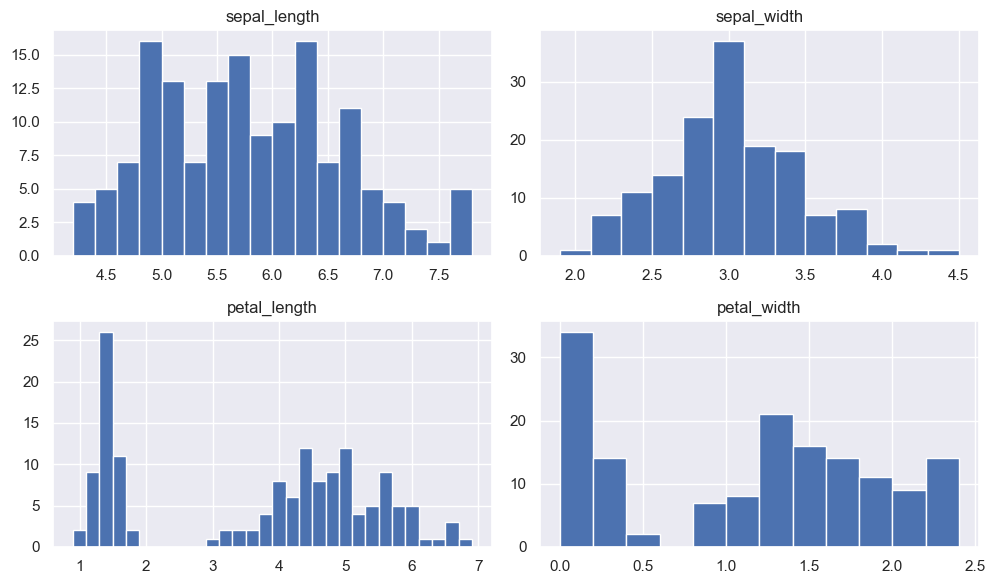

In [4]:
fig, axs = plt.subplots(2, 2, figsize = (10, 6))
for axi, col in zip(axs.flatten(), iris.columns):
    myhist(iris[col], axi, bin_width = 0.2)
plt.tight_layout()

In [5]:
# Posem unes variables d'exemple dels paràmetres que li arriben a la funció
data = iris['sepal_length']
bin_width = 0.2

```python
def myhist(data, axs, bin_width = 0.2):
    bins = np.round(np.arange(data.min(), data.max(), step = bin_width), 2)
    counts = np.unique([np.where(bins <= d)[0][-1] for d in data], return_counts = True)
    axs.bar(bins[counts[0]], counts[1], width = bin_width)
    axs.set_title(data.name)
```

### Primera part: 
- `` bins = np.round(np.arange(data.min(), data.max(), step = bin_width), 2) ``
<br>

- Creem un array de numpy desde el minim de les dades fins al màxim amb un espai entre cada valor de bin_width, que serà el valor de cada bin.
- Arrodonim cada valor creat a 2 decimals màxim

In [6]:
# El metode arange, crea un array amb el pas tal com l'atribut 'step'
np.arange(1, 10, step = 1)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
# Creem un array desde el registre més petit que tenim a data fins al registre més gran amb un pas de bin_width.
# Aquí estaríem perdent l'última dada ja que el np.arange no inclou el rang superior. 
# El bin_width serà la mida (rang del histograma)
arr = np.arange(data.min(), data.max(), step = bin_width)
arr

array([4.3, 4.5, 4.7, 4.9, 5.1, 5.3, 5.5, 5.7, 5.9, 6.1, 6.3, 6.5, 6.7,
       6.9, 7.1, 7.3, 7.5, 7.7])

In [8]:
# El mètode np.round, ens serveix per arrodonir numeros amb la precisció que li indiquem. També li podem passar un array 
# Complert com és el cas.
arr_2 = [1.002, 1.556, 3.67, 5.54]
arr_2 = np.round(arr_2, 2)
arr_2

array([1.  , 1.56, 3.67, 5.54])

In [9]:
# Llavors, per assegurar-nos que tots els valors tenen la mateixa forma, els arrodonim.
bins = np.round(arr, 2)
bins

array([4.3, 4.5, 4.7, 4.9, 5.1, 5.3, 5.5, 5.7, 5.9, 6.1, 6.3, 6.5, 6.7,
       6.9, 7.1, 7.3, 7.5, 7.7])

### Segona part: 
- ``counts = np.unique([np.where(bins <= d)[0][-1] for d in data], return_counts = True)``
<br>

- Iterem per cada valor de data. 
- Per cada valor, quins bins són més petits o iguals que ell.
- Ens quedarem amb l'últim valor. 
- Ens quedarem els valors únics i contarem quants en tenim.

In [10]:
# El metode de numpy where, ens retorna la posició del array que es compleix la condició que li indiquem. Retornarà un 
# array, llavors, per tenir els valors haurèm d'accedir a la posició 0 del que retorna.
arr_3 = np.array([1, 2, 3, 4, 5])
cond = (arr_3 % 2 == 0)

idx = np.where(cond)
idx[0]

array([1, 3], dtype=int64)

In [11]:
data

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: float64

In [12]:
arr_3 = []
for d in data: 
    # El metode where, ens retorna els index de quins bins són més petits o iguals que 'd', llavors per saber l'últim,
    # hem d'accedir a l'últim del array proporcionat.
    b = np.where(bins <= d)
    b[0][-1]
    arr_3.append(b)

In [13]:
# Estem iterant per cada element de data, l'anomenem 'd', seguidament, per cada 'd', l'evaluem amb el where i tenim un 
# array de quins bins són més petits o iguals a 'd'. Accedint a [0][-1], ens quedem amb el valor més gran dins d'aquest
# array, el qual serà l'index del bin al que pertany 'd'
a = [np.where(bins <= d)[0][-1] for d in data]

In [14]:
# El metode unique, ens retorna els valors únics dins l'array
arr_4 = [1,1,2,2,3,3,3,3,3]
np.unique(arr_4)

array([1, 2, 3])

In [15]:
# np.unique, accepta el parametre return_counts, que ens permet retornar dos arrays en comptes de 1. 
# En aquest cas, en el primer array els valors únics i en el segon, quants cops apareix cada valor
np.unique(arr_4, return_counts = True)

(array([1, 2, 3]), array([2, 2, 5], dtype=int64))

In [16]:
# np.unique, ens retorna els valors únics i quants en tenim de cada un.
counts = np.unique(a, return_counts = True)
counts

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17], dtype=int64),
 array([ 4,  5,  7, 16, 13,  7, 13, 15,  9, 10, 16,  7, 11,  5,  4,  2,  1,
         5], dtype=int64))

### Tercera part
- ``axs.bar(bins[counts[0]], counts[1], width = bin_width)``
<br>

- Pintar el plot

<BarContainer object of 18 artists>

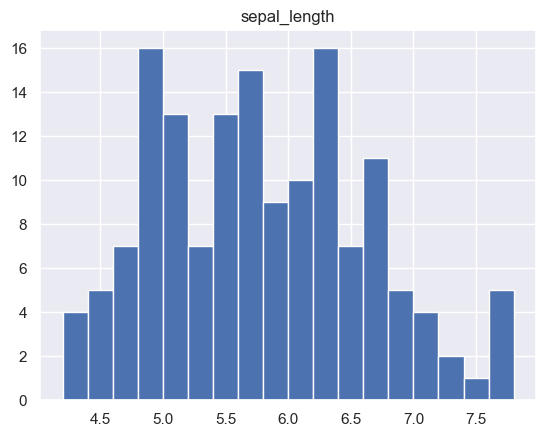

In [17]:
# plt és la funció generica, si definim els axs té una figura, automaticament és representa allà.

# Afegim el titol al histograma
plt.title(data.name)
# Mostrem el gràfic de barres

# bins[count[0]], significa que agafa el valor de counts[0] i el va servir per buscar per index al array de bins i
# obtenir-ne el seu valor.
plt.bar(bins[counts[0]], counts[1], width = bin_width)

### R1: why are the bar widths different in each plot? 
- ``tem fent la mida dels bins a partir de crear un array desde el valor més petit fins al més gran. Llavors si tenim és dades, tindrem és bins, i com que estàn tots al mateix plot, hauràn de sortir més apretats``

In [18]:
# Treiem l'última columna
for col in iris.columns[:-1:]:
    data = iris[col]
    bins = np.round(np.arange(data.min(), data.max(), step = 0.2), 2)
    print(f"atribut: {col}: té -> {len(bins)} elements")

atribut: sepal_length: té -> 18 elements
atribut: sepal_width: té -> 13 elements
atribut: petal_length: té -> 30 elements
atribut: petal_width: té -> 12 elements


### R2: check that the sum of the bars is equal to the length of the data vector 
- ``Perquè és un histograma de freqüència i per tant cada barra, representa quants valors hi ha dins de cada interval``

In [19]:
for idx, col in enumerate(iris.columns[:-1:], start = 1):
    data = iris[col]    
    bins = np.round(np.arange(data.min(), data.max(), step = bin_width), 2)
    counts = np.unique([np.where(bins <= d)[0][-1] for d in data], return_counts = True)
    print(f"{idx}.- Per l'atribut: {col}, tenim {len(data)} registres.")
    # 1 perquè es on tenim el total de cops que apareixen, en el 0, nomès tenim quins són els valors únics
    print(f"Són: {counts[1]}")
    print(f"i sumen {sum(counts[1])}")
    print()

1.- Per l'atribut: sepal_length, tenim 150 registres.
Són: [ 4  5  7 16 13  7 13 15  9 10 16  7 11  5  4  2  1  5]
i sumen 150

2.- Per l'atribut: sepal_width, tenim 150 registres.
Són: [ 1  7 11 14 24 37 19 18  7  8  2  1  1]
i sumen 150

3.- Per l'atribut: petal_length, tenim 150 registres.
Són: [ 2  9 26 11  2  1  2  2  2  4  8  6 12  8  9 12  4  5  9  5  5  1  1  3
  1]
i sumen 150

4.- Per l'atribut: petal_width, tenim 150 registres.
Són: [34 14  2  7  8 21 16 14 11  9 14]
i sumen 150



### R3: Histogram of proportions
- En comptes de mostrar quantes mostres en tenim dins l'interval del bin, hem de mostrar-ne el percentatge. 
- Això ho aconseguim dividint pel total de motstres que tenim.

In [20]:
def prop_myhist(data, axs, bin_width = 0.2):
    bins = np.round(np.arange(data.min(), data.max(), step = bin_width), 2)
    counts = np.unique([np.where(bins <= d)[0][-1] for d in data], return_counts = True)
    # A l'array de freqüències, el dividim per el número de mostres que tenim
    axs.bar(bins[counts[0]], counts[1] / len(data), width = bin_width)
    axs.set_title(data.name)

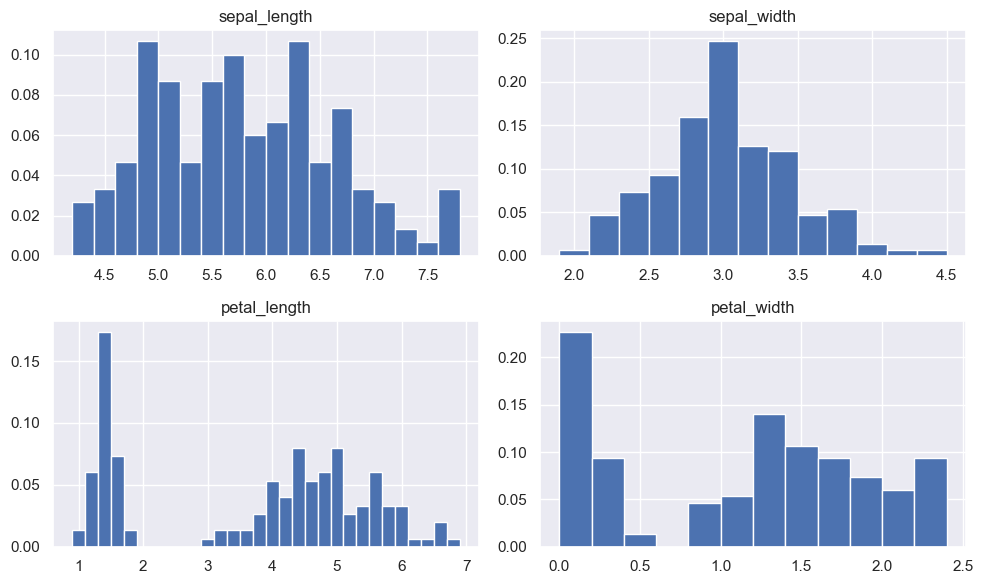

In [21]:
fig, axs = plt.subplots(2, 2, figsize = (10, 6))
for axi, col in zip(axs.flatten(), iris.columns):
    prop_myhist(iris[col], axi, bin_width = 0.2)
plt.tight_layout()

### R4: check the sum of the bar lengths
- Aquí hauría de sumar 1

In [22]:
for idx, col in enumerate(iris.columns[:-1:], start = 1):
    data = iris[col]    
    bins = np.round(np.arange(data.min(), data.max(), step = bin_width), 2)
    counts = np.unique([np.where(bins <= d)[0][-1] for d in data], return_counts = True)
    values = counts[1] / len(data)
    print(f"{idx}.- Per l'atribut: {col}, tenim {len(data)} registres.")
    print(f"Són: {values}")
    print(f"i sumen {sum(values)}")
    print()

1.- Per l'atribut: sepal_length, tenim 150 registres.
Són: [0.02666667 0.03333333 0.04666667 0.10666667 0.08666667 0.04666667
 0.08666667 0.1        0.06       0.06666667 0.10666667 0.04666667
 0.07333333 0.03333333 0.02666667 0.01333333 0.00666667 0.03333333]
i sumen 0.9999999999999999

2.- Per l'atribut: sepal_width, tenim 150 registres.
Són: [0.00666667 0.04666667 0.07333333 0.09333333 0.16       0.24666667
 0.12666667 0.12       0.04666667 0.05333333 0.01333333 0.00666667
 0.00666667]
i sumen 1.0

3.- Per l'atribut: petal_length, tenim 150 registres.
Són: [0.01333333 0.06       0.17333333 0.07333333 0.01333333 0.00666667
 0.01333333 0.01333333 0.01333333 0.02666667 0.05333333 0.04
 0.08       0.05333333 0.06       0.08       0.02666667 0.03333333
 0.06       0.03333333 0.03333333 0.00666667 0.00666667 0.02
 0.00666667]
i sumen 0.9999999999999999

4.- Per l'atribut: petal_width, tenim 150 registres.
Són: [0.22666667 0.09333333 0.01333333 0.04666667 0.05333333 0.14
 0.10666667 0.0933

### R5: Histogram densities
- Hem de dividir per la mida del bin (0.2)

In [23]:
def density_myhist(data, axs, bin_width = 0.2):
    bins = np.round(np.arange(data.min(), data.max(), step = bin_width), 2)
    counts = np.unique([np.where(bins <= d)[0][-1] for d in data], return_counts = True)
    # A l'array de freqüències, el dividim per el número de mostres que tenim i desprpes pel bin_width
    axs.bar(bins[counts[0]], counts[1] / len(data) / bin_width, width = bin_width)
    axs.set_title(data.name)

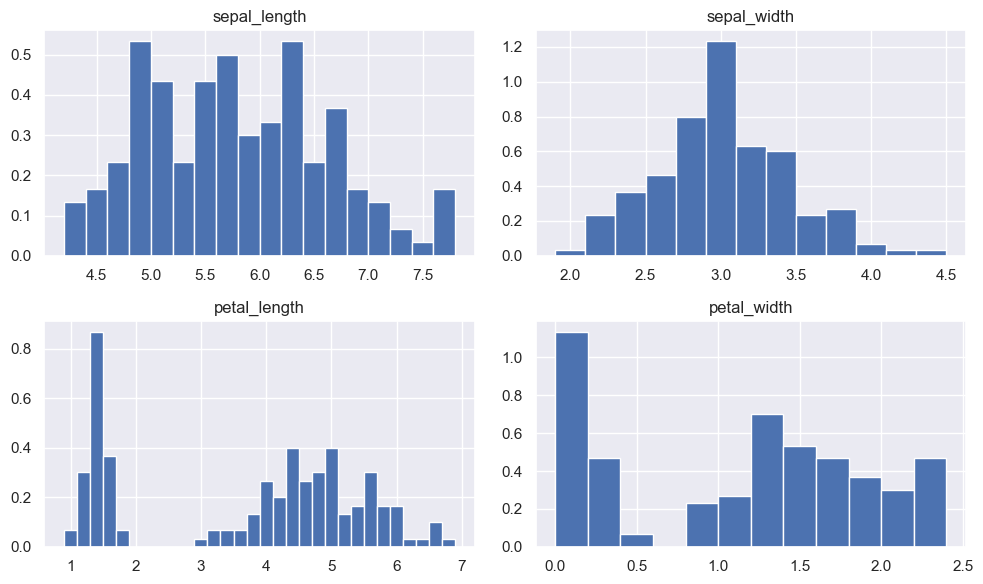

In [24]:
fig, axs = plt.subplots(2, 2, figsize = (10, 6))
for axi, col in zip(axs.flatten(), iris.columns):
    density_myhist(iris[col], axi, bin_width = 0.2)
plt.tight_layout()

### R6: chek the sum of the bar lengths, why is it different from 1?
- Perquè l'histograma de densitats representa com d'apretats estàn les mostres dins l'interval. 

In [25]:
for idx, col in enumerate(iris.columns[:-1:], start = 1):
    data = iris[col]    
    bins = np.round(np.arange(data.min(), data.max(), step = bin_width), 2)
    counts = np.unique([np.where(bins <= d)[0][-1] for d in data], return_counts = True)
    values = counts[1] / len(data) / bin_width
    print(f"{idx}.- Per l'atribut: {col}, tenim {len(data)} registres.")
    print(f"sumen {sum(values)}")
    print()

1.- Per l'atribut: sepal_length, tenim 150 registres.
sumen 5.0

2.- Per l'atribut: sepal_width, tenim 150 registres.
sumen 4.999999999999999

3.- Per l'atribut: petal_length, tenim 150 registres.
sumen 5.0

4.- Per l'atribut: petal_width, tenim 150 registres.
sumen 5.0



### R7: what do you have to do to make them sum up to 1?
- Hem de normalitzar-ho, per fer això, dividim el valor de cada altura per la suma de totes les altures.
- Més que normalitzar senzillament és tornar a multiplicar per el bin_width (imagina't que els bins no fossin tots de la mateixa amplada, en aquest cas normalitzar seria incorrecte)

In [26]:
for idx, col in enumerate(iris.columns[:-1:], start = 1):
    data = iris[col]    
    bins = np.round(np.arange(data.min(), data.max(), step = bin_width), 2)
    counts = np.unique([np.where(bins <= d)[0][-1] for d in data], return_counts = True)
    values = counts[1] / len(data) / bin_width
    # Dividim per la suma de totes les altures
    values_norm = values / sum(values)
    print(f"{idx}.- Per l'atribut: {col}, tenim {len(data)} registres.")
    print(f"sumen {sum(values_norm)}")
    print()

1.- Per l'atribut: sepal_length, tenim 150 registres.
sumen 0.9999999999999999

2.- Per l'atribut: sepal_width, tenim 150 registres.
sumen 1.0000000000000002

3.- Per l'atribut: petal_length, tenim 150 registres.
sumen 0.9999999999999999

4.- Per l'atribut: petal_width, tenim 150 registres.
sumen 1.0



### R7: Make a figure with the histogram of densities for petal-length with bin_width = 0.2, 0.4, 0.8 (share the y-axis)

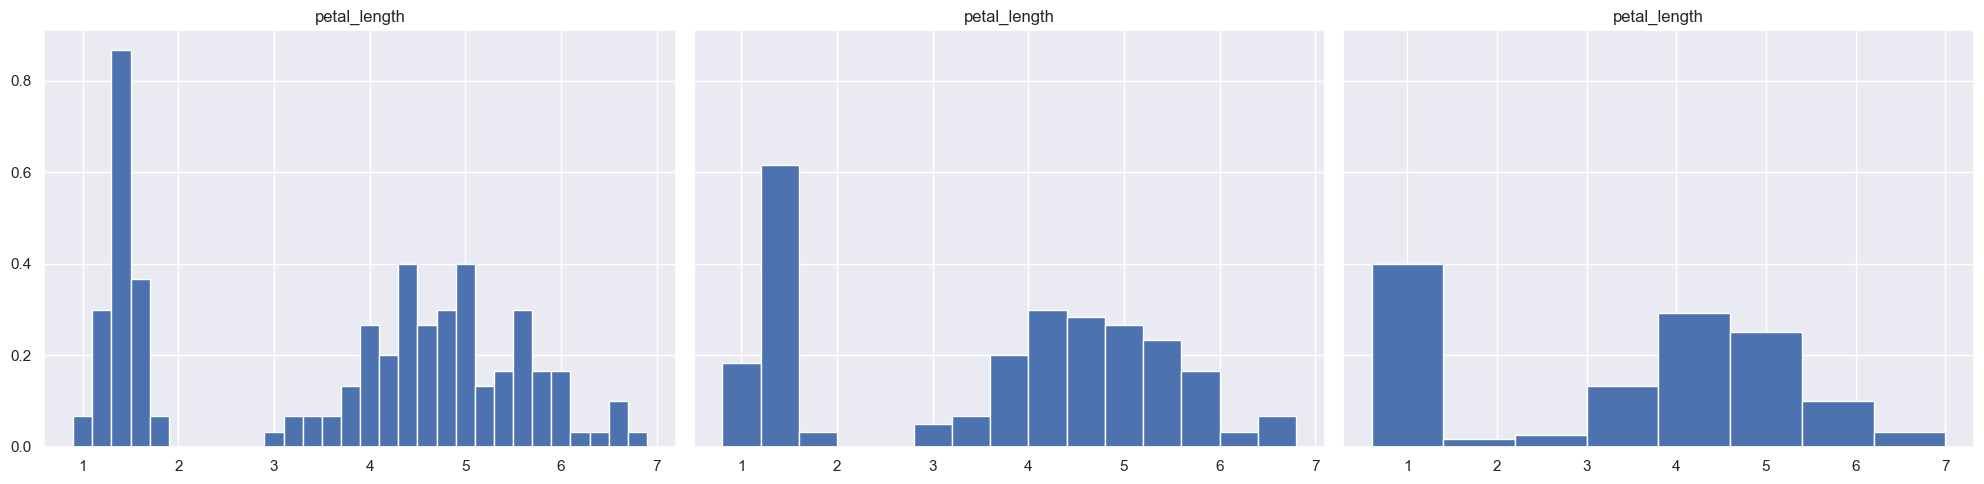

In [27]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5), sharey=True)

for idx, bin_width in enumerate([0.2, 0.4, 0.8]):
    density_myhist(iris['petal_length'], axs[idx], bin_width = bin_width)
    
plt.tight_layout()

### R8: explain the differences between the plots
- Cada cop és més baix.
- Si fem més gran el ``bin_width``, estem acceptant més mostres dins de cada interval, això ens modificarà el plot. 
- Si de cada interval estem agafant més mostres i dividim per el mateix número, dividirem un numero més gran per la mateixa 'n', llavors sortirà un valor més baix i el histograma pujarà menys. 
- En el de 0.8, surten valors a tots els bins pel mateix motiu, perquè estem donant la oportunitat a que caiguin valors dins.

### R9: what is common in all of them?
- La proporció de la distribució.
- Es mante que de 0-1 hi han valors, llavors de 2-4 menys i la majoria està entre 3-6 i a partir de 7 n'hi ha menys. 
- Es a dir, veiem com es mostra la variable dins el conjunt de dades.